#### Overview - Dimension Reduction

<img src="images/why_fe.png" alt="overview" style="width: 500px;"/>

- Dimensionality reduction looks for patterns and data and uses these patterns to re express the data in a lower dimensional form
- This makes computation much more efficient 
- Discarding noisy features that cause significant problems for supervised learning tasks like regression and classification
- Reduces multicollinearity (two or more independent variables in a linear regression model are highly correlated with each other) by removing redundant features
-  Reducing our space to 2D or 3D may help us to plot and observe patterns more clearly

#### Methods

1. Prinicpal Component Analysis 
2. Single Value Decomposition
3. Non-Negative Matrix Factorization

In [29]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA


##### 1. PCA
- Unsupervised algorithm that creates linear combinations of the original features
- Aims to keep as much variance as possible from the original data in a lower dimensional space
- Finds the best axis to project the data so that the variance of the projections is maximized
- Transformation of high-dimensional data to low-dimensional data using PCA (Each resultant dimension is a linear combination of n features)
- Compute Covariance Matrix -> Compute Eigenvectors, Eigenvalues -> Sort Eigenvectors by Eigenvalues -> Choose Principal Components -> Transform
* Can only be done for square matrixes

In [2]:
# Load data into a pandas dataframe
data = pd.read_csv("data/HTRU_2.csv", names=['mean_ip', 'sd_ip', 'ec_ip',
                                        'sw_ip', 'mean_dm', 'sd_dm',
                                        'ec_dm', 'sw_dm', 'pulsar'])

data.head()

,mean_ip,sd_ip,ec_ip,sw_ip,mean_dm,sd_dm,ec_dm,sw_dm,pulsar
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [3]:
features = data[[col for col in data.columns if col != "pulsar"]]
labels = data["pulsar"]

In [27]:
robust_data = RobustScaler().fit_transform(features)

In [33]:
pca_all = PCA()

# Fit to scaled data
pca_all.fit(robust_data)

# Save cumulative explained variance
cum_var = (np.cumsum(pca_all.explained_variance_ratio_))
n_comp = [i for i in range(1, pca_all.n_components_ + 1)]

d:\My Project\mlops deeplearning-ai\notebooks\model_interpretability\venv39\lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


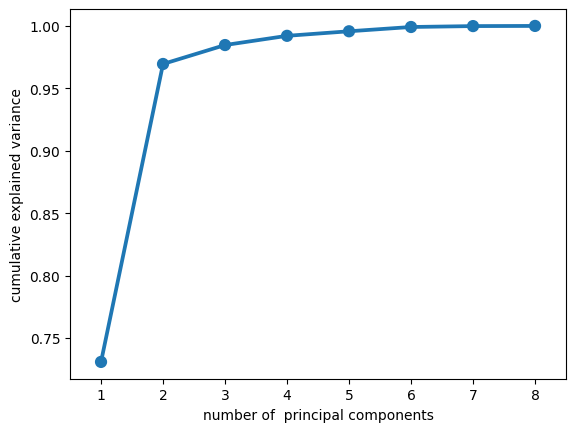

In [37]:
# Plot cumulative variance
ax = sns.pointplot(x=n_comp, y=cum_var)
ax.set(xlabel='number of  principal components', ylabel='cumulative explained variance')
plt.show()

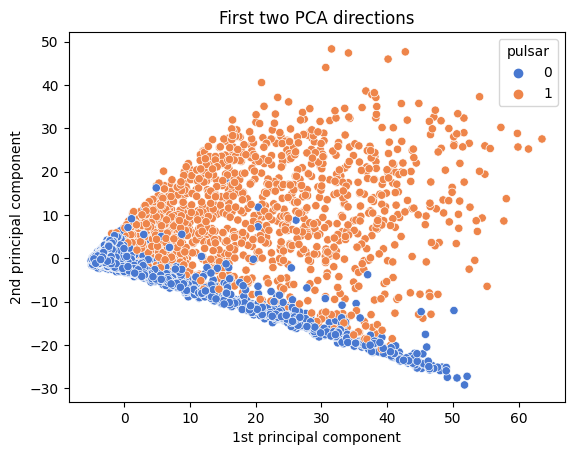

In [38]:
# Instantiate PCA with 2 components
pca_2 = PCA(2)

# Fit and transform scaled data
pca_2.fit(robust_data)
data_2pc = pca_2.transform(robust_data)

# Render the 2D plot
ax = sns.scatterplot(x=data_2pc[:,0],
                     y=data_2pc[:,1],
                     hue=labels,
                     palette=sns.color_palette("muted", n_colors=2))

ax.set(xlabel='1st principal component', ylabel='2nd principal component', title='First two PCA directions')
plt.show()

##### 2. SVD 

- PCA relies on eigendecomposition, which can only be done for square matrices
- However you don’t always have square matrices, and sometimes you have really sparse matrices(A sparse matrix is a matrix that contains a large number of zero elements relative to the total number of elements in the matrix)
- SVD decomposes the original dataset into its constituents, resulting in a reduction of dimensionality
- It is used to remove redundant features from the dataset.

<img src="images/svd.png" alt="overview" style="width: 500px;"/>
<img src="images/svd_details.png" alt="overview" style="width: 500px;"/>
<img src="images/svd_image.png" alt="overview" style="width: 500px;"/>

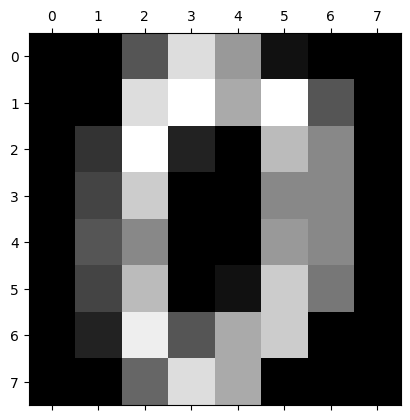

In [39]:
from sklearn.datasets import load_digits

# Load the digits dataset
digits = load_digits()

# Plot first digit
image = digits.data[0].reshape((8, 8))
plt.matshow(image, cmap = 'gray')
plt.show()

In [40]:
X = digits.data

# Normalize pixel values
X = X/255

# Print shapes of dataset and data points
print(f"Digits data has shape {X.shape}\n")
print(f"Each data point has shape {X[0].shape}\n")

Digits data has shape (1797, 64)

Each data point has shape (64,)



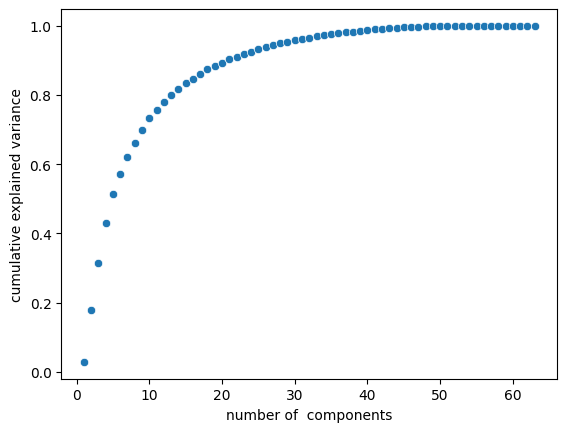

In [42]:
from sklearn.decomposition import TruncatedSVD

# Instantiate Truncated SVD with (original dimension - 1) components
org_dim = X.shape[1] # 64
tsvd = TruncatedSVD(org_dim - 1)
tsvd.fit(X)

# Save cumulative explained variance
cum_var = (np.cumsum(tsvd.explained_variance_ratio_))
n_comp = [i for i in range(1, org_dim)]

# Plot cumulative variance
ax = sns.scatterplot(x=n_comp, y=cum_var)
ax.set(xlabel='number of  components', ylabel='cumulative explained variance')
plt.show()

In [57]:
print(f"Explained variance with 5 components: {float(cum_var[14:15])*100:.2f}%")

Explained variance with 5 components: 83.38%


C:\Users\clare\AppData\Local\Temp\ipykernel_16692\3470918985.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f"Explained variance with 5 components: {float(cum_var[14:15])*100:.2f}%")


In [58]:
# Instantiate a Truncated SVD with 5 components
tsvd = TruncatedSVD(n_components=15)

# Get the transformed data
X_tsvd = tsvd.fit_transform(X)

# Print shapes of dataset and data points
print(f"Original data points have shape {X[0].shape}\n")
print(f"Transformed data points have shape {X_tsvd[0].shape}\n")

Original data points have shape (64,)

Transformed data points have shape (15,)



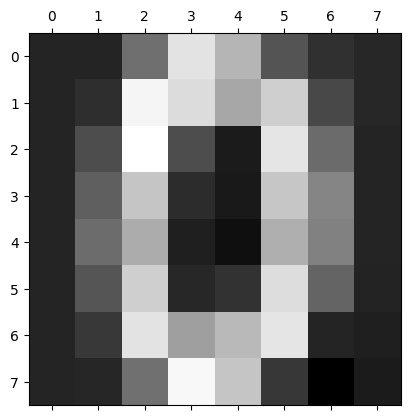

In [61]:
image_reduced_5 = tsvd.inverse_transform(X_tsvd[0].reshape(1, -1)) # 1x64
image_reduced_5 = image_reduced_5.reshape((8, 8)) # 8x8
plt.matshow(image_reduced_5, cmap = 'gray')
plt.show()

##### 3. Non-negative Matrix Factorization (NMF)

- NMF expresses samples as combinations of interpretable parts. 
- This means NMF models are easier to understand and much easier for us to explain to others
- NMF can't be applied to every dataset, however(It requires the sample features be non-negative, so greater than or equal to 0)
- For example, it represents documents as combinations of topics, and images in terms of commonly occurring visual patterns. 

<img src="images/nmf.png" alt="overview" style="width: 500px;"/>

- V: Represents the feature matrix where m is the number of observations (samples) and n is the number of features (variables)

- W : Represents the transformed data matrix after applying NMF, m is the number of observations (samples) and k is the number of latent factors or components. In other words, k describes the amount of dimensionality that we want to keep. It is actually a hyperparameter that we need to specify.

- H : Represents the factorization matrix where k and n have the same definitions above. 

##### Image Example

In [74]:
digits= load_digits()
image_data = digits.data

print("Shape:", image_data.shape)
print("Type:", type(image_data))

Shape: (1797, 64)
Type: <class 'numpy.ndarray'>


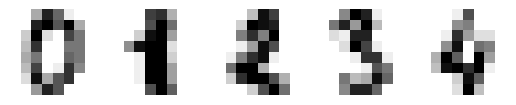

In [80]:
n = 5
plt.figure()
for i in range(n):
  ax = plt.subplot(1, n, i+1)
  plt.imshow(image_data[i].reshape(8, 8), cmap="binary")
  ax.axis('off')

plt.show()

In [92]:
from sklearn.decomposition import NMF

nmf_model = NMF(n_components=15, init='random', random_state=0)
image_data_nmf = nmf_model.fit_transform(image_data)

print("Shape:", image_data_nmf.shape)
print("Type:", type(image_data_nmf))

Shape: (1797, 15)
Type: <class 'numpy.ndarray'>


d:\My Project\mlops deeplearning-ai\notebooks\model_interpretability\venv39\lib\site-packages\sklearn\decomposition\_nmf.py:1770: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


In [93]:
print("V_shape:", image_data.shape)
print("W_shape:", image_data_nmf.shape)
print("H_shape", nmf_model.components_.shape)

V_shape: (1797, 64)
W_shape: (1797, 15)
H_shape (15, 64)


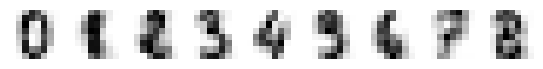

In [94]:
image_data_nmf_recovered = nmf_model.inverse_transform(image_data_nmf)

n = 9
plt.figure(figsize=(6.75, 1.5))
for i in range(n):
  ax = plt.subplot(1, n, i+1)
  plt.imshow(image_data_nmf_recovered[i, :].reshape(8, 8), cmap="binary")
  ax.axis('off')

plt.show()

In [95]:
# error between V and WH
nmf_model.reconstruction_err_

700.392601627527

##### Text NLP Example

In [62]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
from sklearn.datasets import fetch_20newsgroups

# Download data
data = fetch_20newsgroups(remove=('headers', 'footers', 'quotes'))

data = data.get("data")

In [63]:
print(f"Data has {len(data)} elements.\n")
print(f"First 2 elements: \n")
for n, d in enumerate(data[:2], start=1):
  print("======"*10)
  print(f"Element number {n}:\n\n{d}\n")

Data has 11314 elements.

First 2 elements: 

Element number 1:

I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Element number 2:

A fair number of brave souls who upgraded their SI clock oscillator have
shared their experiences for this poll. Please send a brief message detailing
your experiences with the procedure. Top speed attained, CPU rated speed,
add on cards and adapters, heat sinks, hour of usage per day, floppy disk
functionality with 800 and 1.4 m floppies are especially requested.

I will be summarizing in the next two days, so please add to the networ

In [65]:
# Instantiate vectorizer setting dimensionality of data
# The stop_words param refer to words (in english) that don't add much value to the content of the document and must be ommited
vectorizer = TfidfVectorizer(max_features=500, stop_words='english')

# Vectorize original data
vect_data = vectorizer.fit_transform(data)

# Print dimensionality
print(f"Data has shape {vect_data.shape} after vectorization.")
print(f"Each data point has shape {vect_data[0].shape} after vectorization.")

Data has shape (11314, 500) after vectorization.
Each data point has shape (1, 500) after vectorization.


In [67]:
# Desired number of components
n_comp = 5

# Instantiate NMF with the desired number of components
nmf = NMF(n_components=n_comp, random_state=42)

# Apply NMF to the vectorized data
nmf.fit(vect_data)

reduced_vect_data = nmf.transform(vect_data)

# Print dimensionality
print(f"Data has shape {reduced_vect_data.shape} after NMF.")
print(f"Each data point has shape {reduced_vect_data[0].shape} after NMF.")

# Save feature names for plotting
feature_names = vectorizer.get_feature_names_out()

Data has shape (11314, 5) after NMF.
Each data point has shape (5,) after NMF.


In [68]:
print(f"Original text:\n{data[0]}\n")

print(f"Representation based on topics:\n{reduced_vect_data[0]}")

Original text:
I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Representation based on topics:
[0.00554834 0.         0.         0.05431621 0.04026962]


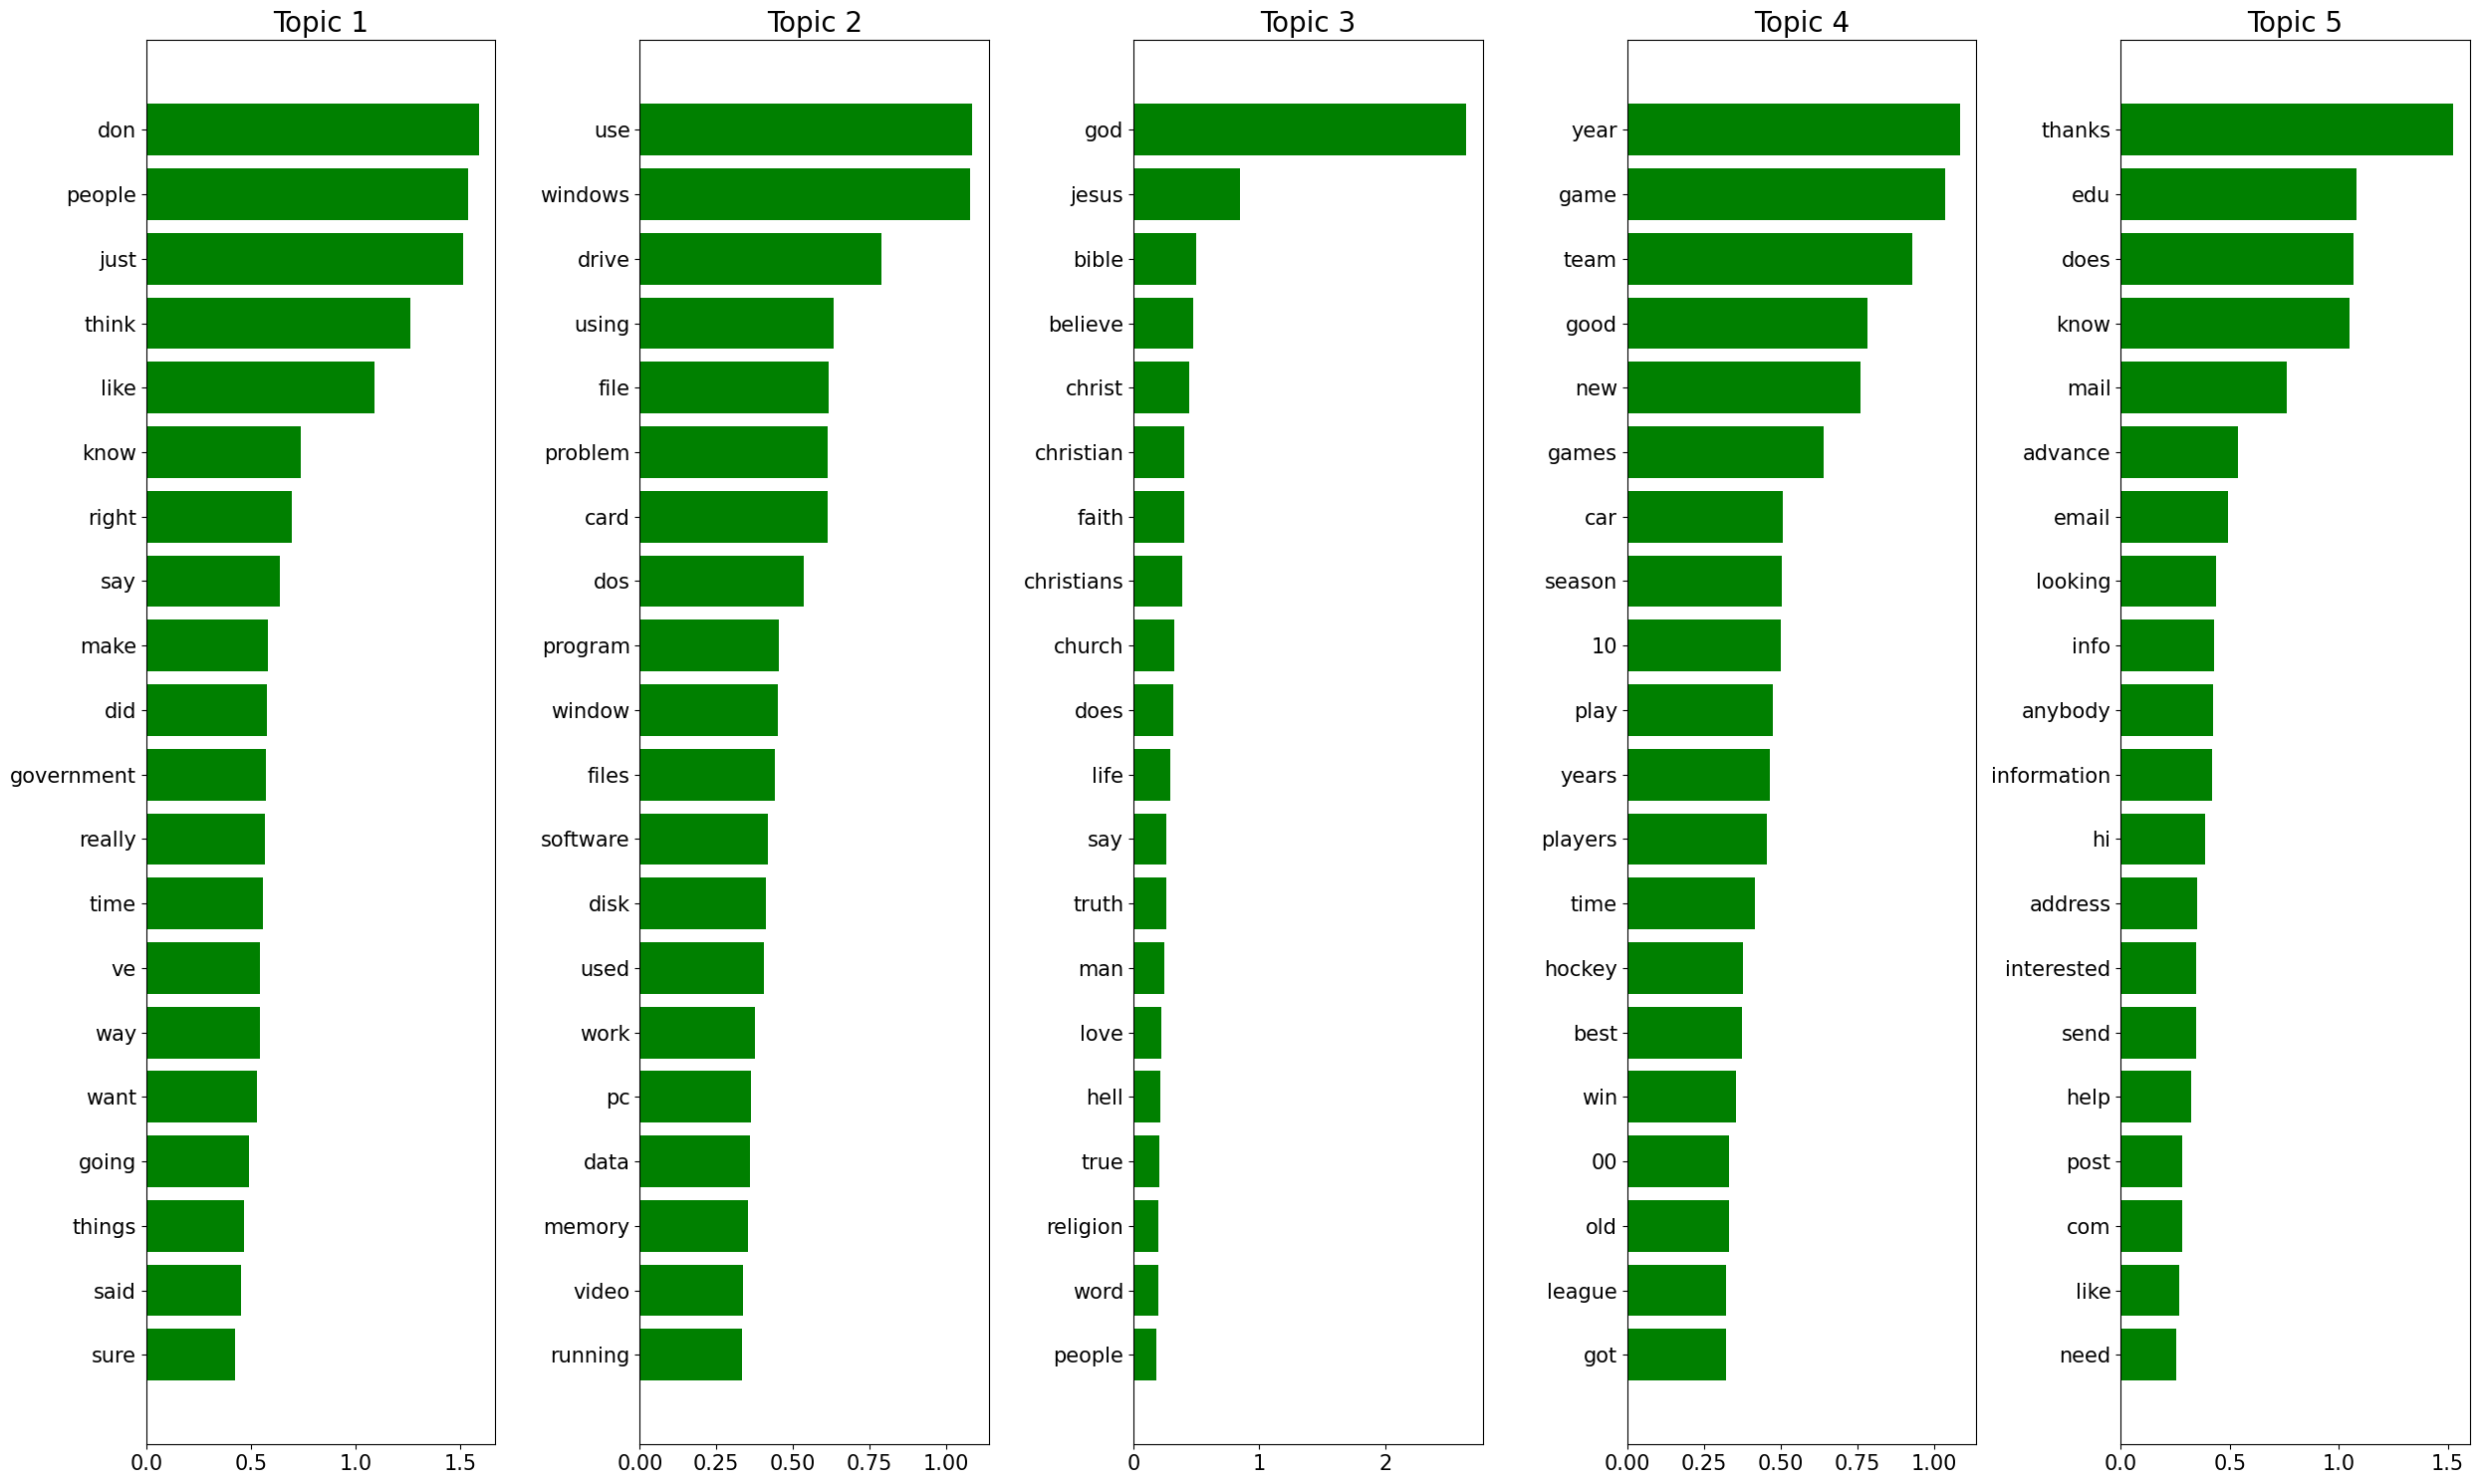

In [70]:
# Define function for plotting top 20 words for each topic
def plot_words_for_topics(n_comp, nmf, feature_names):
  fig, axes = plt.subplots(((n_comp-1)//5)+1, 5, figsize=(25, 15))
  axes = axes.flatten()

  for num_topic, topic in enumerate(nmf.components_, start=1):

    # Plot only the top 20 words

    # Get the top 20 indexes
    top_indexes = np.flip(topic.argsort()[-20:])

    # Get the corresponding feature name
    top_features = [feature_names[i] for i in top_indexes]

    # Get the importance of each word
    importance = topic[top_indexes]

    # Plot a barplot
    ax = axes[num_topic-1]
    ax.barh(top_features, importance, color="green")
    ax.set_title(f"Topic {num_topic}", {"fontsize": 20})
    ax.invert_yaxis()
    ax.tick_params(labelsize=15)

  plt.tight_layout()
  plt.show()

# Run the function
plot_words_for_topics(n_comp, nmf, feature_names)

- The first topic is hard to describe but seems to be related to people and actions.

- The second one is clearly abouth tech stuff.

- Third one is about religion.

- Fourth one seems to revolve around sports and/or games.

- And the fifth one about education and/or information.
